<a href="https://colab.research.google.com/github/blotaey/Projects-ML-2020-/blob/main/3projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 5.7MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [ ]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

In [ ]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
troca = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


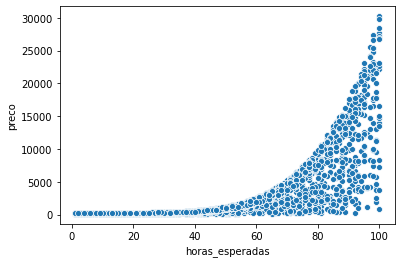

In [ ]:
import seaborn as sns

sns.scatterplot(x = "horas_esperadas", y = "preco", data=dados)


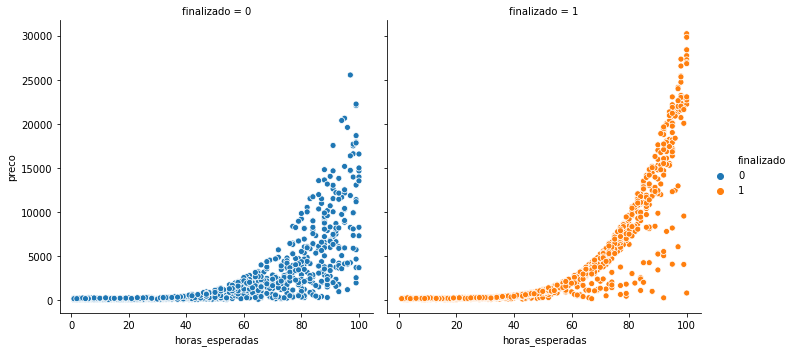

In [ ]:





sns.relplot(x = "horas_esperadas", y = "preco", hue = "finalizado", col = "finalizado", data=dados)

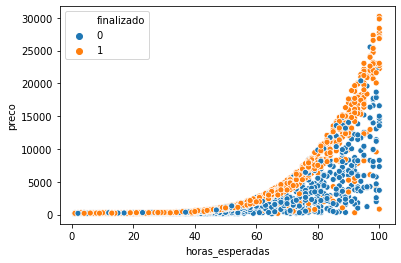

In [ ]:
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = "finalizado", data=dados)

In [ ]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 30

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np  
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia de baseline foi %.2f%%" % acuracia)

A acurácia de baseline foi 52.59%


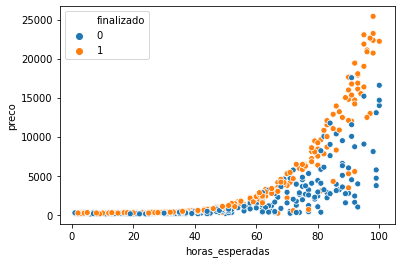

In [ ]:
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = teste_y, data=teste_x)

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min,x_max,y_min,y_max)

1 100 100 25427


In [ ]:
pixels = 100
eixo_x = np.arange(x_min,x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max, (y_max - y_min) / pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

In [ ]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

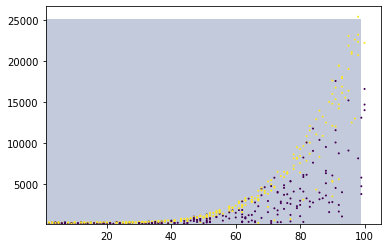

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1) 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 111
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.74%


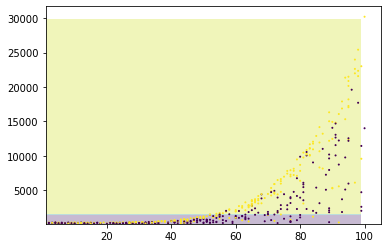

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
pixels = 100
eixo_x = np.arange(x_min,x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min,y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1) 